# CAR PRICE SUGGESTION

### Introduction
One of the main barriers of selling a car is to choose the right car price. It usually takes seller an enourmous time to put the right price, seller usually do this by researching the market for the correct price.

With the data of vehicle already posted in Chotot, we can use it to predict a suitable price range for any given car. The application of this model is varied such as:
* Price suggestion when inserting ads
* Warning for incorrect price/scam price when reviewing ads
* Buyer can estimate their current car value 

The dataset below was extracted from all car ads inserted in 2018 with info: brand name, model, manufacturing date, mileage, region posted, fuel type, gearbox type and price.

### 1. Exploratory Data Analysis

#### 1.1. Read & clean the data

In [123]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv('car_price.csv')

In [17]:
cars.head()

,approved_date,region,condition_name,brand_name,model_name,mfdate,mileage,mileage_v2,fuel_type,gearbox,price
0,2019-01-04,13,used,NaN,NaN,NaN,1.0,0.0,NaN,NaN,440000000.0
1,2019-01-10,12,used,Ford,Transit,NaN,1.0,NaN,NaN,NaN,100000000.0
2,2019-01-14,12,used,Ford,Transit,NaN,1.0,NaN,NaN,NaN,100000000.0
3,2019-01-01,8,used,Kia,Pride,2000.0,1.0,501.0,Petrol,Manual,50000000.0
4,2019-01-01,10,used,Toyota,Innova,2010.0,1.0,10.0,Petrol,Manual,370000000.0


In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13675 entries, 0 to 13674
Data columns (total 11 columns):
approved_date     13675 non-null object
region            13675 non-null int64
condition_name    13675 non-null object
brand_name        13665 non-null object
model_name        13661 non-null object
mfdate            13668 non-null float64
mileage           13673 non-null float64
mileage_v2        13617 non-null float64
fuel_type         12833 non-null object
gearbox           13606 non-null object
price             13661 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.1+ MB


In [19]:
cars.describe()

,region,mfdate,mileage,mileage_v2,price
count,13675.000000,13668.000000,13673.000000,13617.000000,1.366100e+04
mean,9.223254,2011.827334,10.637095,68042.885658,5.463643e+08
std,4.409503,6.609262,9.883069,125967.953560,8.083205e+08
min,1.000000,1980.000000,1.000000,0.000000,1.250000e+06
25%,5.000000,2008.000000,1.000000,135.000000,2.490000e+08
50%,12.000000,2014.000000,8.000000,36000.000000,4.480000e+08
75%,13.000000,2017.000000,18.000000,85000.000000,6.510000e+08
max,13.000000,2019.000000,37.000000,1000000.000000,5.000000e+10


Summary:
* There are 8 columns and 13653 observations.
* Some column contain missing values such as brand_name, model_name and mfdate
* Region was mapping with code
* Lowest mfdate is 1980 due to capping when insert ads and major and car above 2008 
* Mileage is categorical data 
* Min price of cars is unrealisitic with 1.26M
* Large Car of Chotot Xe is less than 651M (75%)

In [56]:
#Cleaning the data
cars_c = cars.dropna()
cars_c = cars_c[
    (cars_c["mfdate"].between(2000, 2019, inclusive=True)) &
    (cars_c["region"].between(1, 13, inclusive=True)) &
    (cars_c["price"].between(100000000, 3000000000, inclusive=True)) &
    (cars_c["mileage_v2"].between(0, 700000, inclusive=True))
]
        

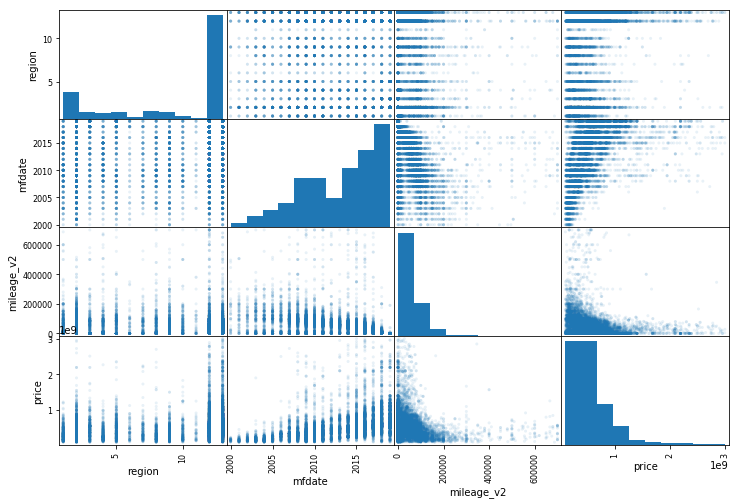

In [57]:
num_attributes = ['region', 'mfdate','mileage_v2','price']
%matplotlib inline
pd.plotting.scatter_matrix(cars_c[num_attributes], figsize = (12,8), alpha = 0.1);

Summary:
* Unbalance region data
* mfdate has positive correlation with price. Mfdate increase and price also increase
* mileage_v2 has negative correlation with price. Mileage increase and price decrease

In [58]:
### Amount discarded
print('Number of observations:',len(cars_c), 'observations')
print('Data ammount left:',len(cars_c)/len(cars))

Number of observations: 11559 observations
Current ammount: 0.8452650822669104


#### 1.2. Explore variables in the dataset

##### 1.2.1. Price

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


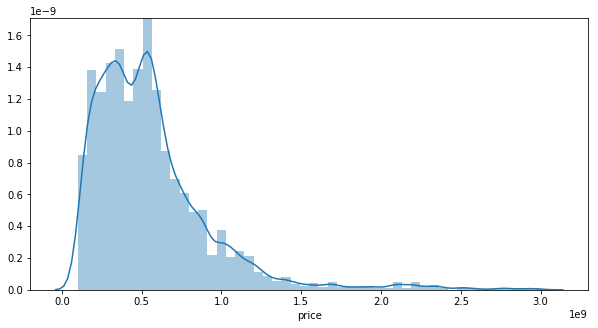

In [59]:
plt.figure(figsize=(10,5))
sns.distplot(cars_c.price.dropna())

In [60]:
#Ads log price
cars_c['price_log'] = np.log(cars_c.price)

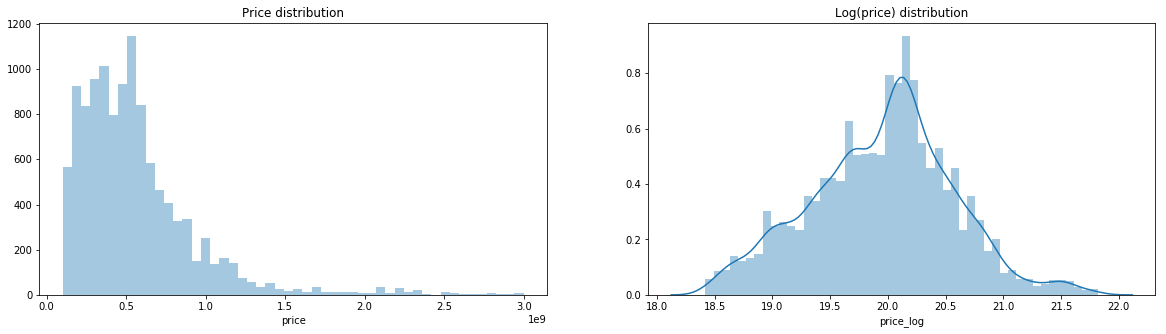

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Price distribution')
sns.distplot(cars_c.price,kde=0);

plt.subplot(1, 2, 2)
plt.title('Log(price) distribution')
sns.distplot(cars_c.price_log);

Log of price has a more symmetric distribution than normal price, which can be used for better predicting the price

##### 1.2.2. Manufacture date

<Figure size 1440x360 with 0 Axes>

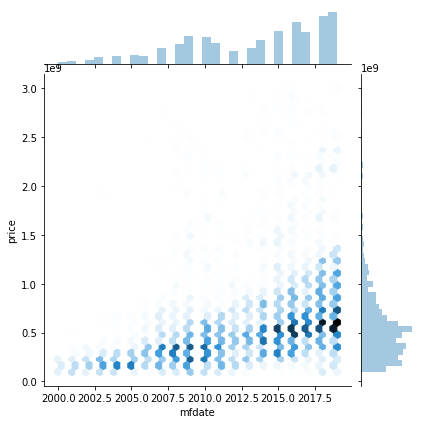

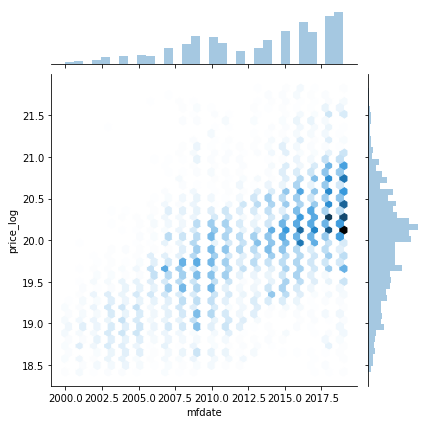

In [62]:
#price vs mfdate
plt.figure(figsize=(20,5));
sns.jointplot(x=cars_c.mfdate,y=cars_c.price,kind='hex');
sns.jointplot(x=cars_c.mfdate,y=cars_c.price_log,kind='hex');

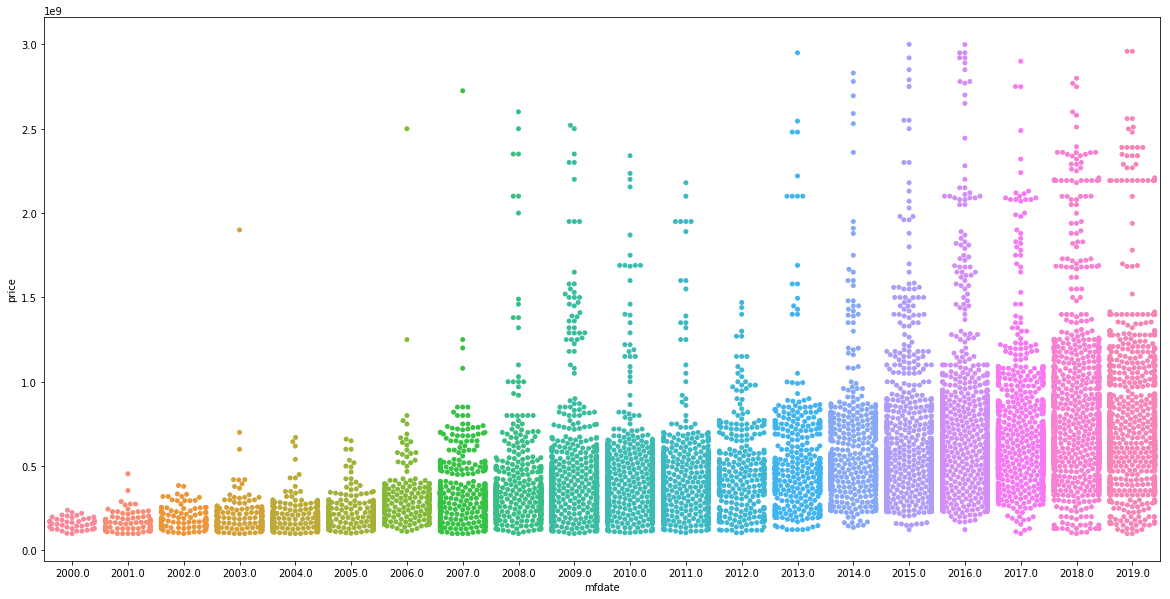

In [63]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='mfdate',y='price',data=cars_c)

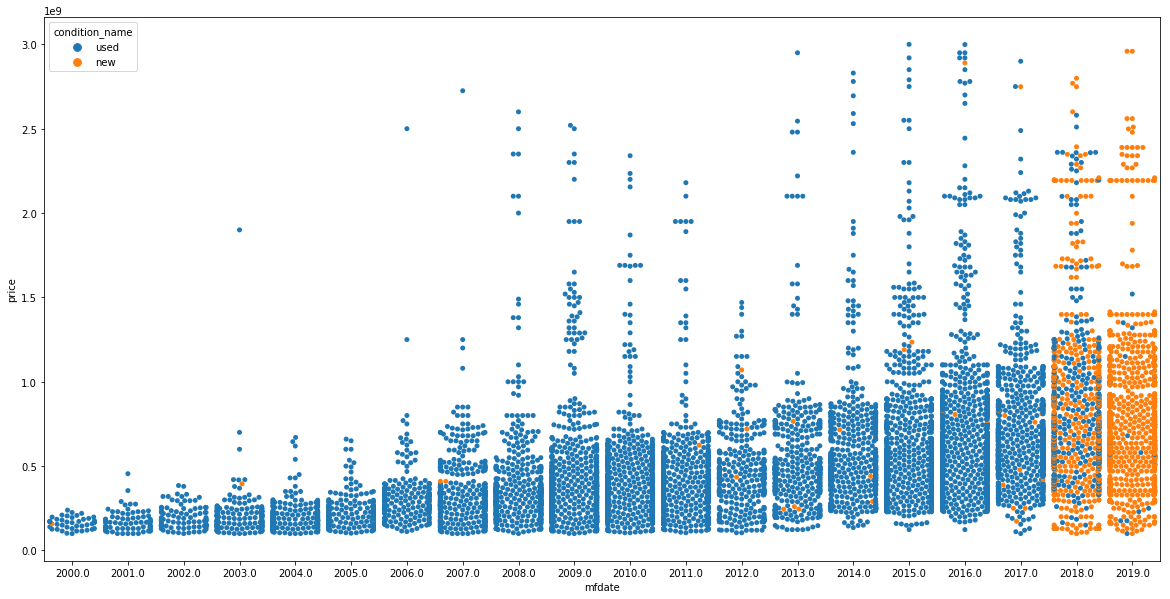

In [64]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='mfdate',y='price',hue='condition_name',data=cars_c)

Summary:
* Higher mfdate has higher price range, mfdate is a good predictor for price
* Many Cars are posted in 2008-2011 and above 2014
* Most of car in 2019 are new while 2018 is half new and half used
* Car of 2017 and below are almost used. But there are some Cars with mfdate below 2019 marked as new condition, which could be faulty input -> should fix the data of car with year below 2018 for better performance

##### 1.2.3.How does mileage affect to the car's price?

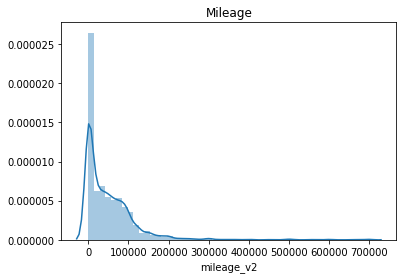

In [65]:
plt.title('Mileage')
sns.distplot(cars_c.mileage_v2);

* While mileage data heavily scaled to the right, there's a lot of car with mileage below 200,000 km

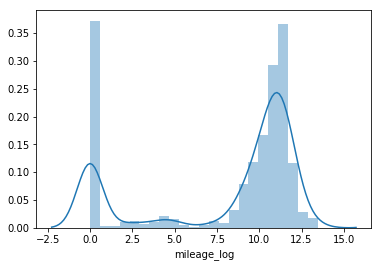

In [168]:
#mileage_log = log(mileage+1) for 0 mileage value
cars_c['mileage_log'] = np.log(cars_c.mileage_v2+1)
sns.distplot(cars_c.mileage_log)

There's binomal distribution in the mileage data, intuitively reflect the new and used car.
* New car: 0 mileage and one column (36% of data)
* Used car: normal distribution for log(mileage_v2+1)

In this case we want to build a model for predicting used car price, so we should remove the new car from the dataset

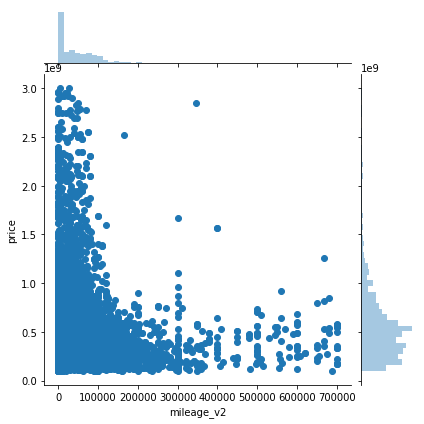

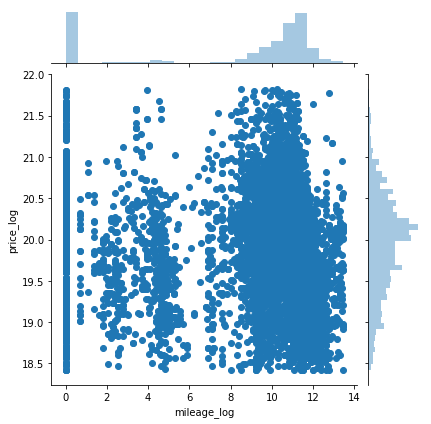

In [169]:
#price vs mileage
sns.jointplot(x=cars_c.mileage_v2,y=cars_c.price);
sns.jointplot(x=cars_c.mileage_log,y=cars_c.price_log);

Summary:
* About 35% of cars input with 0 mileage 
* Car's mileage has skewed to left which indicates there are some cars with very high mileage (maximum 700K km)

##### 1.2.4. How does region affect to the price

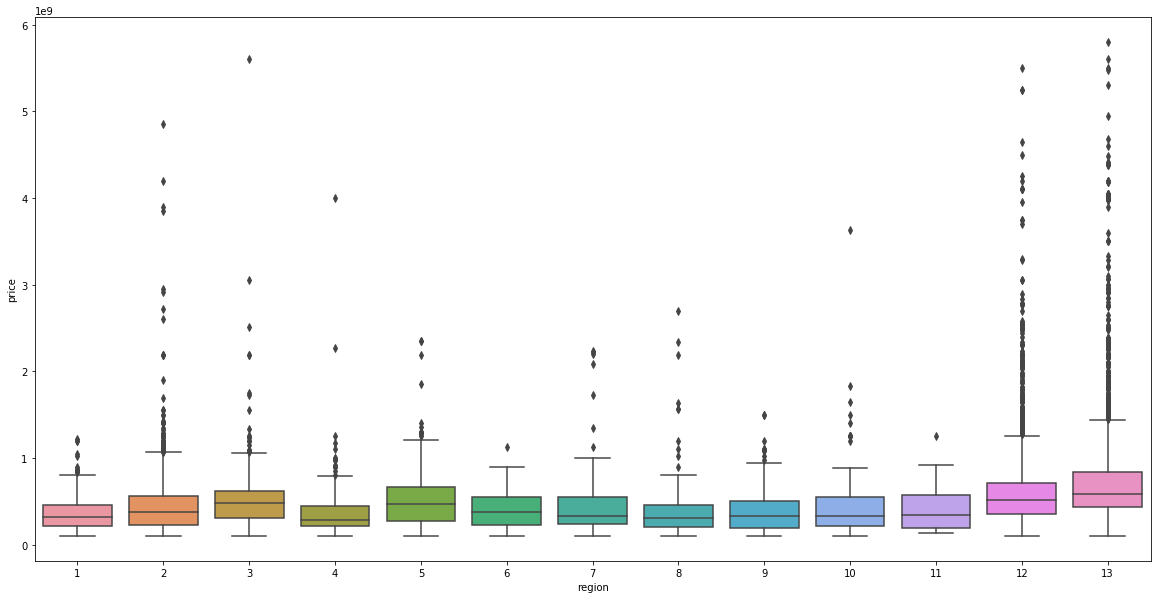

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(x='region',y='price',data=cars_c);

Summary:
* HN (12) and HCM (13) people seems to have a better life than other regions with higher 1st quantile and 3rd quantile of price. 


##### 1.2.5. Brand name and model name

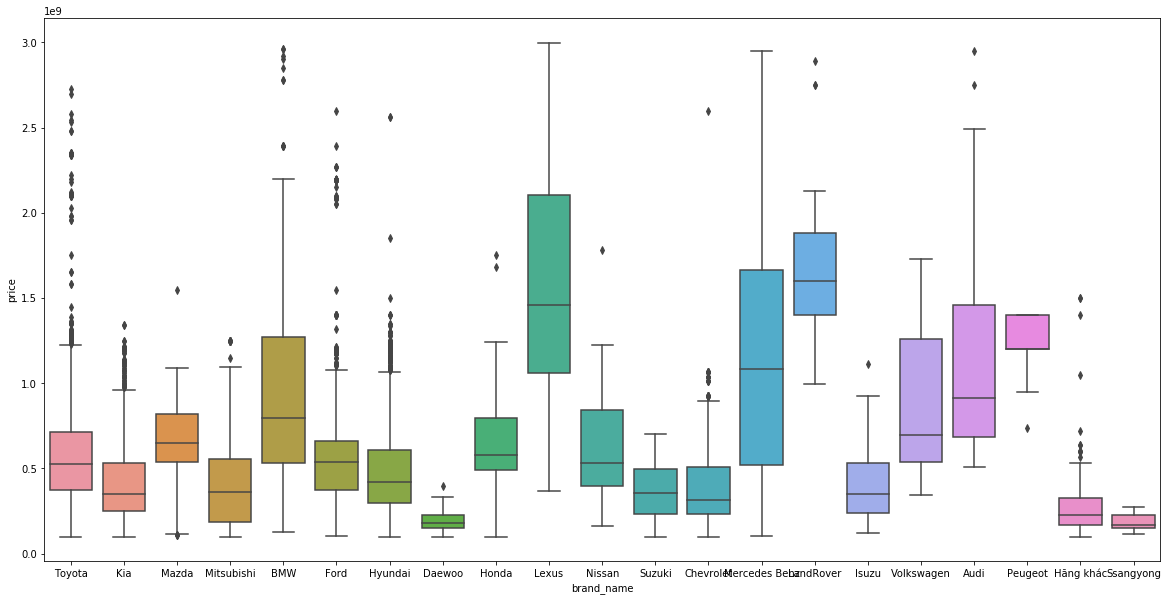

In [66]:
#Top ten popular brand in the dataset
top_car_brand = cars_c.brand_name.value_counts()[0:21].index.values

plt.figure(figsize=(20,10))
sns.boxplot(x='brand_name', y='price',data= cars_c[cars_c.brand_name.isin(top_car_brand)])


Top brand name with higher range of price than others, which are luxury brands:
* BMW
* Lexus
* Mercedes Benz
* Land Rover
* Audi. This is the most expensive brand with highest 1st quantile and 3rd quantile

Since brand are quite distinct in price, this can be a good predictor for the price

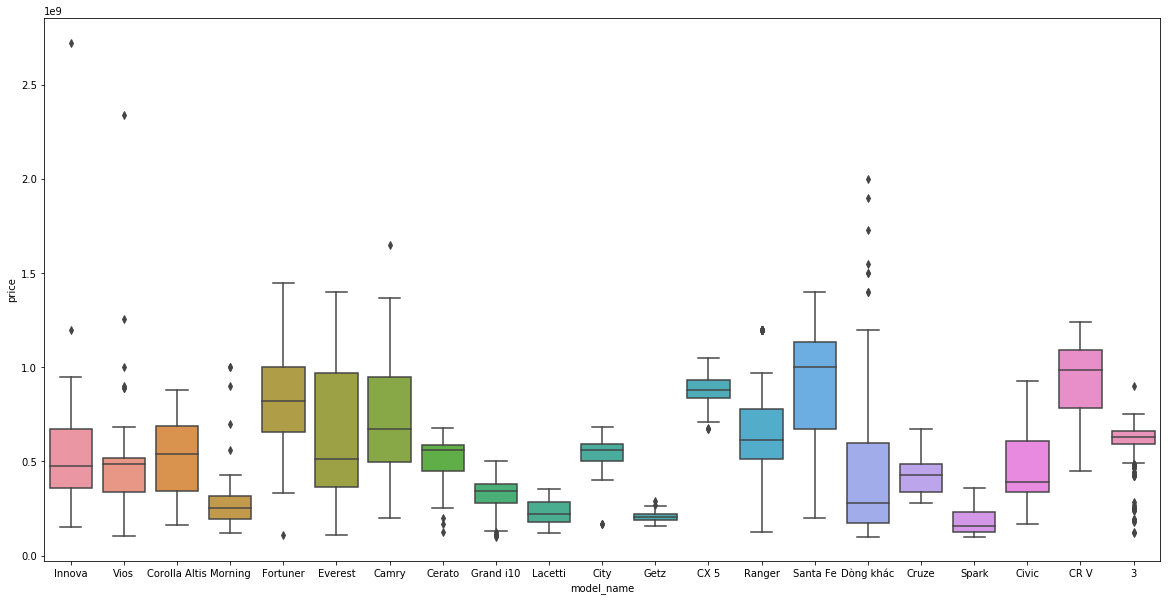

In [67]:
top_car_model = cars_c.model_name.value_counts()[0:21].index.values
plt.figure(figsize=(20,10))
sns.boxplot(x='model_name', y='price',data= cars_c[cars_c.model_name.isin(top_car_model)])

Summary:
* Some outliers in Innova and Vios (above 2.3B)
* Model name also a good predictor for price

##### 1.2.6. Update faulty input in condition and remove N/A value

In [68]:
#change condition of car with mfdate < 2018
cars_c.loc[cars_c.mfdate<2018, 'condition_name'] = 'used'
#remove car with mileage = 0
# cars_c = cars_c[cars_c.mileage_v2>0]
#remove na value
cars_c = cars_c.dropna()
#data drop
print('Number of obs:',len(cars_c))
print('Data amount left:',len(cars_c)/len(cars))

Number of obs: 11559
Data amount left: 0.8452650822669104


#### 1.3. Correlation heatmap 

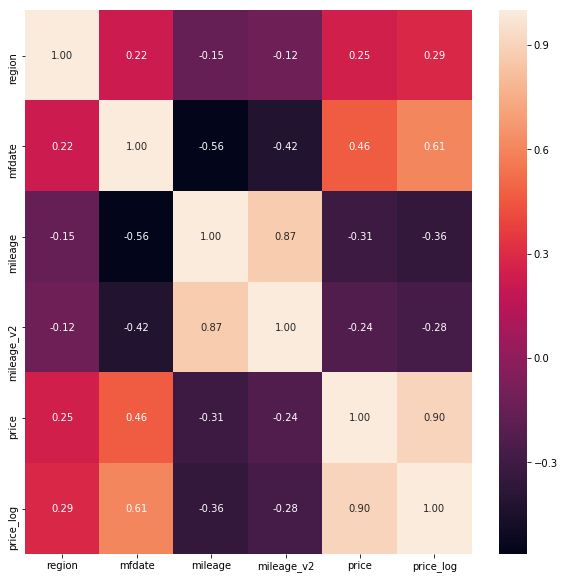

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(cars_c.corr(),annot=True,fmt='.2f')

Features with high correlation with price:
* Region
* Car_brand
* Car_model
* Mfdate
* Mileage_v2
* Mileage

### 2.Train the model

#### 2.1. Selecting features

In [84]:
# column for use: 'region','brand_name','model_name'
select_columns = ['region','brand_name','model_name','mfdate','mileage_v2','condition_name']
category_columns = ['region','brand_name','model_name','condition_name']
X = cars_c[select_columns]
y = cars_c['price']

#### 2.2. Feature transform

In [85]:
#Preprocessing the data before feeding the model
##One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), category_columns),],  # the column I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
Xt = ct.fit_transform(X) 

#### 2.3. Train with Linear Regression

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test,cars_c_train,cars_c_test = train_test_split(Xt,y,cars_c,test_size=0.2,random_state=101)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (9247, 389)
X_test shape: (2312, 389)
y_train shape: (9247,)
y_test shape: (2312,)


MAE:  89858070.01715885
MSE:  2.9759918595908144e+16
RMSE:  172510633.28359833
R2:  0.775339060093608


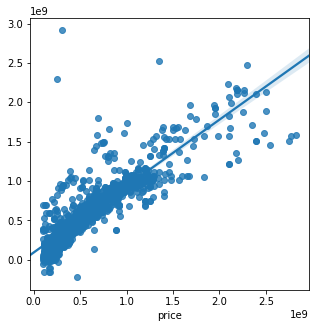

In [124]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

#model score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

plt.figure(figsize=(5,5))
sns.regplot(x= y_test,y= predictions)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',math.sqrt(mse))
print('R2: ',lm.score(X_test,y_test))

With Linear Regression we get are a score R2 of 0.78. Let's try using different model for better result

#### 2.4. Different model score

Scaled_Ridge: 0.782062 (+/- 0.034341)
Scaled_Lasso: 0.740068 (+/- 0.034292)
Scaled_Elastic: 0.712292 (+/- 0.031440)
Scaled_SVR: -0.029524 (+/- 0.011673)
Scaled_RF_reg: 0.828736 (+/- 0.036268)
Scaled_ET_reg: 0.833589 (+/- 0.031465)
Scaled_BR_reg: 0.830845 (+/- 0.036844)
Scaled_Hub-Reg: 0.329592 (+/- 0.014257)
Scaled_BayRidge: -0.001057 (+/- 0.000956)
Scaled_DT_reg: 0.795964 (+/- 0.038582)
Scaled_KNN_reg: 0.747678 (+/- 0.047082)
Scaled_Gboost-Reg: 0.733678 (+/- 0.032978)
Scaled_RFR_PCA: 0.395243 (+/- 0.064634)


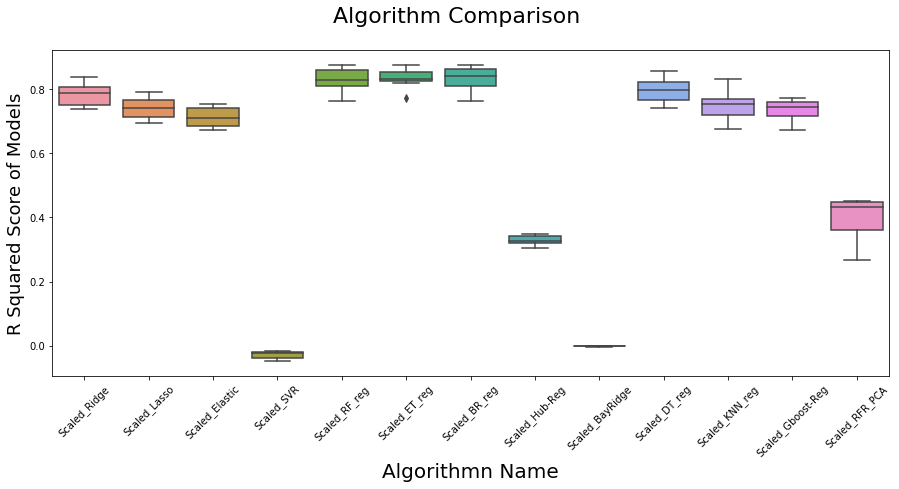

In [134]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
# from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE


pipelines = []
seed = 2

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

# pipelines.append(
#                 ("Scaled_XGB_reg",
#                  Pipeline([
#                      ("Scaler", StandardScaler()),
#                      ("XGBR", XGBRegressor(seed=seed))
#                  ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

# pipelines.append(
#                 ("Scaled_XGBR_PCA",
#                  Pipeline([
#                      ("Scaler", StandardScaler()),
#                      ("PCA", PCA(n_components=3)),
#                      ("XGB", XGBRegressor())
#                  ])))


scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Some of the top performance models are:
* RandomForest Regressor: 0.828
* ExtraTreesRegressor: 0.833
* BaggingRegressor: 0.831

#### 2.5. Tune up RandomForest Regresssor

In [171]:
#Tune up RandomForest regressor using Random Search
best_model = RandomForestRegressor(random_state=13)
best_model.fit(X_train,y_train)
print(best_model.score(X_test,y_test))
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(best_model.get_params())

0.8634927277161246
Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}


In [165]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest: 10 trees -> 200 trees
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [166]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [172]:
#Knowning the best params
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [173]:
# Predicting with best params
predicted_price = rf_random.predict(X_test)

MAE:  61000906.12625524
MSE:  1.621116335216663e+16
RMSE:  127323066.85030262
R2: 0.8776201223825063


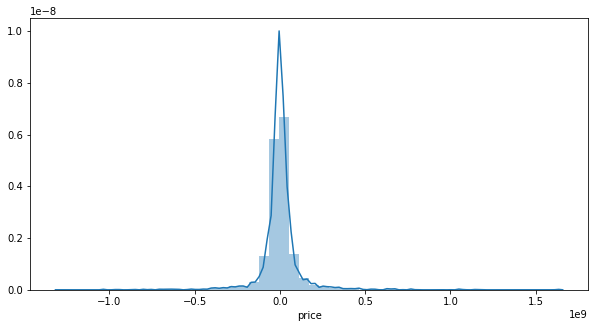

In [189]:
print('MAE: ',mean_absolute_error(y_test,predicted_price))
print('MSE: ',mean_squared_error(y_test,predicted_price))
print('RMSE: ',math.sqrt(mean_squared_error(y_test,predicted_price)))
print('R2:',rf_random.score(X_test,y_test))

plt.figure(figsize=(10,5))
sns.distplot(y_test-predicted_price)

### 3. Checking the price

In [186]:
def check_price(region='',brand_name='',model_name='',mfdate=0,mileage_v2=0,condition_name=''):
    df = pd.DataFrame({'region':region,'brand_name':brand_name,'model_name':model_name,'mfdate':mfdate,'mileage_v2':mileage_v2,'condition_name':condition_name},index=[0])
    df = ct.transform(df)
    price = rf_random.predict(df)
    return print('Suggested price:',round(price.astype('int64')[0]/1e6*0.97,2),'M - ',round(price.astype('int64')[0]/1e6*1.03,2),'M')


In [187]:
check_price(12,'Toyota','Innova',2016.0,10000,'used')

Suggested price: 608.72 M -  646.37 M


### 4. Further investigate

There are still some cars predicted with price far different from the true price. Let's check what are they

In [195]:
error = y_test-predicted_price
print('Number of Cars predicted with price difference larger than 200M:',len(error[np.abs(error)> 2e8]))
print('Portion of predicted large price difference:',len(error[np.abs(error)> 2e8])/len(error))

Number of Cars predicted with price difference larger than 200M: 141
Portion of predicted large price difference: 0.06098615916955017


In [202]:
cars_c_test[np.abs(error)> 2e8]

,approved_date,region,condition_name,brand_name,model_name,mfdate,mileage,mileage_v2,fuel_type,gearbox,price,price_log
1188,2019-01-06,12,new,Ford,Focus,2018.0,1.0,0.0,Petrol,Auto,2.300000e+08,19.253590
10965,2019-01-17,12,used,Kia,K5,2017.0,5.0,20000.0,Petrol,Auto,8.880000e+08,20.604482
6528,2019-02-09,13,new,Ford,Ranger,2019.0,1.0,0.0,Diesel,Auto,6.160000e+08,20.238758
3413,2019-01-15,2,new,Honda,CR V,2019.0,1.0,0.0,Petrol,Both,4.500000e+08,19.924758
12366,2019-01-25,12,new,Ford,Ranger,2018.0,1.0,0.0,Diesel,Manual,1.260000e+08,18.651792
7537,2019-01-26,13,new,BMW,5 Series,2019.0,1.0,0.0,Petrol,Auto,2.389000e+09,21.594141
9177,2019-01-29,10,used,Mercedes Benz,GL Class,2015.0,5.0,20000.0,Petrol,Auto,1.500000e+09,21.128731
12299,2019-01-14,8,used,Hãng khác,Dòng khác,2018.0,1.0,99.0,Diesel,Manual,3.300000e+08,19.614603
450,2019-01-03,13,used,Toyota,Innova,2018.0,6.0,29000.0,Petrol,Manual,7.800000e+08,20.474804
5475,2019-01-25,12,used,Honda,Civic,2010.0,21.0,100000.0,Petrol,Manual,1.700000e+08,18.951309


With quick scan, there are a lot of new cars and some uncommon cars, or rare in the dataset

In [204]:
cars_c_test[np.abs(error)> 2e8]['condition_name'].value_counts()

used    89
new     52
Name: condition_name, dtype: int64

This problem can be improve by collecting more data or using oversampling method for better training data. 

### 5.Conclusion

* The price of car are calculated from 97% - 103% of the predicted price, however the range can be improve by using the min and max value of generated values from randomforrest regressor
* The dataset has some rare and uncommon car which is hard to predict, oversampling can help boosting the performance of the model

The application for this project is potentially huge and helpful, especially for both buyers, sellers and Chotot
* With buyers, they can simply input their VIN number and mileage, Chotot can calculated a range of value for their car
* With sellers, they can get the suggestion in ads insertion
* With Chotot, we can filtered out bad car price by embedding the suggestion in price review and warning if the input price is out of range